# Shiva Shamloo

# Q1

In [90]:
import pandas as pd
import numpy as np

Loading the data

In [142]:
data=pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')


### a.Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

First thing that comes to mind is to get the average of the order_amount column. so:

In [143]:
data['order_amount'].mean()

3145.128

Since the stores sell shoes, this number doesn't seems realistic So we continue with our analysis.

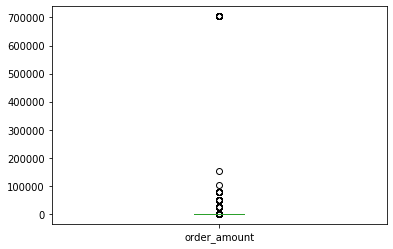

In [144]:
data[['order_amount']].plot(kind='box')

In [175]:
data[['order_amount']].describe()

,order_amount
count,5000.000000
mean,3145.128000
std,41282.539349
min,90.000000
25%,163.000000
50%,284.000000
75%,390.000000
max,704000.000000


From the above result we can see that our data has many outliers. So let's try to analyze them:

In [145]:
data.sort_values(['order_amount','created_at'],ascending=False,inplace=True)
data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
2835,2836,42,607,704000,2000,credit_card,2017-03-28 4:00:00
2969,2970,42,607,704000,2000,credit_card,2017-03-28 4:00:00
4056,4057,42,607,704000,2000,credit_card,2017-03-28 4:00:00
4882,4883,42,607,704000,2000,credit_card,2017-03-25 4:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00


It appears that user 607 buys huge number of shoes from store 42 at dates close to each other.

In [146]:
df=data[['order_amount']].groupby('order_amount').size().reset_index(name='size').sort_values('order_amount',ascending=False)

df.head(10)

,order_amount,size
257,704000,17
256,154350,1
255,102900,1
254,77175,9
253,51450,16
252,25725,19
251,1760,1
250,1408,2
249,1086,1
248,1064,1


from the above result, we can see that there is a repetition of order amount of 77175, 51450 and 25725.

In [147]:
data[data['order_amount']==77175]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
1259,1260,78,775,77175,3,credit_card,2017-03-27 9:27:20
2564,2565,78,915,77175,3,debit,2017-03-25 1:19:35
2690,2691,78,962,77175,3,debit,2017-03-22 7:33:25
4192,4193,78,787,77175,3,credit_card,2017-03-18 9:25:32
3403,3404,78,928,77175,3,debit,2017-03-16 9:45:05
2906,2907,78,817,77175,3,debit,2017-03-16 3:45:46
3724,3725,78,766,77175,3,credit_card,2017-03-16 14:13:26
4420,4421,78,969,77175,3,debit,2017-03-09 15:21:35
4715,4716,78,818,77175,3,debit,2017-03-05 5:10:44


In [148]:
data[data['order_amount']==51450]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
1529,1530,78,810,51450,2,cash,2017-03-29 7:12:01
2452,2453,78,709,51450,2,cash,2017-03-27 11:04:04
2495,2496,78,707,51450,2,cash,2017-03-26 4:38:52
490,491,78,936,51450,2,debit,2017-03-26 17:08:19
3101,3102,78,855,51450,2,credit_card,2017-03-21 5:10:34
4079,4080,78,946,51450,2,cash,2017-03-20 21:14:00
2512,2513,78,935,51450,2,debit,2017-03-18 18:57:13
617,618,78,760,51450,2,cash,2017-03-18 11:18:42
2818,2819,78,869,51450,2,debit,2017-03-17 6:25:51
493,494,78,983,51450,2,cash,2017-03-16 21:39:35


In [149]:
data[data['order_amount']==25725]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
1419,1420,78,912,25725,1,cash,2017-03-30 12:23:43
3085,3086,78,910,25725,1,cash,2017-03-26 1:59:27
2773,2774,78,890,25725,1,cash,2017-03-26 10:36:43
4584,4585,78,997,25725,1,cash,2017-03-25 21:48:44
4505,4506,78,866,25725,1,debit,2017-03-22 22:06:01
3440,3441,78,982,25725,1,debit,2017-03-19 19:02:54
3151,3152,78,745,25725,1,credit_card,2017-03-18 13:13:07
1204,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21
2548,2549,78,861,25725,1,cash,2017-03-17 19:36:00
1452,1453,78,812,25725,1,credit_card,2017-03-17 18:09:54


In [164]:
data[data['order_amount']==154350]


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
691,692,78,878,154350,6,debit,2017-03-27 22:51:43


In [165]:
data[data['order_amount']==102900]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
2492,2493,78,834,102900,4,debit,2017-03-04 4:37:34


As we can see from the above result, it appears that store 78 has the most expensive shoe type with the value of 25725 which is not usual for a regular sneaker. Removing these outliers will result in better way to evaluate the data.

In [169]:
data[['order_amount']][~data['order_amount'].isin([704000,77175,154350,102900,51450,25725,25725])].describe()

,order_amount
count,4937.000000
mean,302.580514
std,160.804912
min,90.000000
25%,163.000000
50%,284.000000
75%,387.000000
max,1760.000000


removing the above outliers will result in the average of \\$302.58 which seems acceptable since it is close to median which is \\$284

### b. What metric would you report for this dataset?

I would have used median since it is not affected by the outliers.

### c.What is its value?

From the above analysis, the median is \\$284 which seems normal.

# Q2

### a.How many orders were shipped by Speedy Express in total?

SELECT Count(*) FROM Orders JOIN Shippers ON Shippers.ShipperID=Orders.ShipperID WHERE Shippers.ShipperName='Speedy Express'

answer= 54

### b.What is the last name of the employee with the most orders?

SELECT Employees.LastName, COUNT(*) AS number_of_orders FROM Orders JOIN Employees ON Orders.EmployeeID=Employees.EmployeeID GROUP BY Employees.LastName ORDER BY number_of_orders DESC LIMIT 1

answer=Peacock with 40 orders

### c.What product was ordered the most by customers in Germany?


SELECT Products.ProductName, SUM(OrderDetails.Quantity) AS ordered FROM Orders JOIN Customers ON Customers.CustomerID=Orders.CustomerID JOIN OrderDetails ON OrderDetails.OrderID=Orders.OrderID
JOIN Products ON Products.ProductID=OrderDetails.ProductID WHERE Customers.Country='Germany' GROUP BY OrderDetails.ProductID ORDER BY ordered DESC LIMIT 1

answer= Boston Crab Meat which was ordered 160 as quantity.